# Setup

In [1]:
import importlib # for hot reloading

#driver
from hamilton import driver

#DAG(s)
from bizwiz.trade.dags import find_country_data


api_key = "b1a3f42948df4538a17418bdfdc5574a"

import bizwiz
from bizwiz import trade_data 

path_manager = bizwiz.PathManager(
    data_dir = "../data/comtrade/"
)

# Find Countries

In [2]:
from bizwiz.trade import search_codes
countries = [
    'sweden',
    'canada',
    'united states',
    'china',
    'india',
    'germany',
    'france',
]

df = search_codes.find_country_codes(keywords=countries, filepath='../data/comtrade/iso_country_codes.csv')
df

,name,iso,comtrade_query,keyword
0,Sweden,SWE,752,sweden
1,Canada,CAN,124,canada
2,United States of America,USA,"840,842,841",united states
3,China,CHN,156,china
4,India,IND,"699,356",india
5,Germany,DEU,"280,276",germany
6,France,FRA,"251,250",france


# Find HS Codes

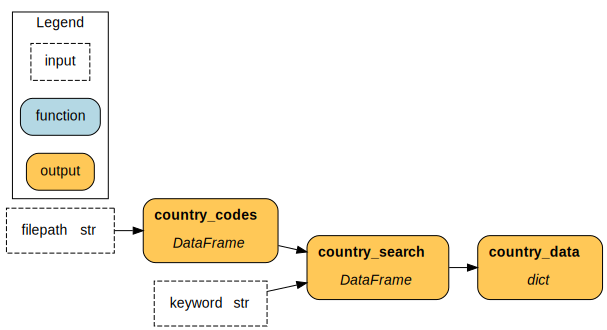

['country_codes', 'country_search', 'country_data']

In [50]:
#DAG(s)
from bizwiz.trade.dags import find_country_data
importlib.reload(find_country_data)

#build graph
dr =  driver.Builder().with_modules(find_country_data).build()

#execute
final_vars = ["country_codes", "country_search","country_data"]
inputs = {
    'keyword' : 'united states',
    'filepath' : '../data/comtrade/iso_country_codes.csv',
}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)

#execute
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(list(results.keys()))

In [52]:
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides={'keyword' : 'united states'},
)
print(results['country_data'])
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides={'keyword' : 'germany'},
)
print(results['country_data'])

{'name': 'United States of America', 'iso': 'USA', 'comtrade_query': '840,842,841'}
{'name': 'Germany', 'iso': 'DEU', 'comtrade_query': '280,276'}


# Find HS Code

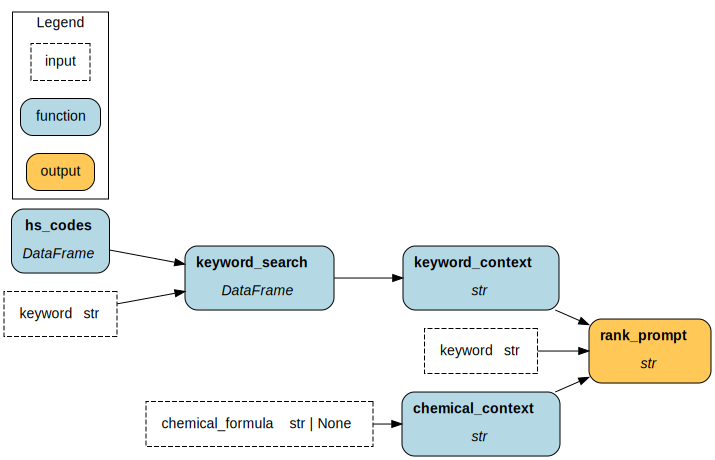

['rank_prompt']

In [48]:
#DAG(s)
from bizwiz.trade.dags import find_hs_code
importlib.reload(find_hs_code)

#build graph
dr =  driver.Builder().with_modules(find_hs_code).build()

#execute
final_vars = ["rank_prompt",]
inputs = {
    'keyword' : 'caustic',
    'chemical_formula' : None
}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)

#execute
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(list(results.keys()))

In [49]:
print(results['rank_prompt'])


    The user is searching for an appropriate HS Code to represent a specific chemical.

    We ran have multiple search hits and need to rank them to find the best candidate.

    # Search Information

    Below is information about our current search

    ## User Input
    caustic

    ## Keyword Results
    {"id":{"0":"281511","1":"281520"},"text":{"0":"281511 - Sodium hydroxide (caustic soda); solid","1":"281520 - Potassium hydroxide (caustic potash)"},"score":{"0":90,"1":90}}

    ## Additional Chemical Information
    
  
    # Instructions

    Rank the Keyword results ordinally starting with 1 as the best and most appropriate HS Code for the search.
    


## Develop DAG

In [3]:
#build graph
dr =  driver.Builder().with_modules(dag_query_iso_country).build()

#execute
final_vars = []
inputs = {}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)


## Execute

In [ ]:
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(results)